# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science 

## Homework 1

**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader

---


## Main Theme: Data Collection - Web Scraping - Data Parsing 
#### Learning Objectives 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you read the data from a file, then you scrape them directly from a website. You look for specific pieces of information by parsing the data, you clean the data to prepare them for analysis, and finally, you answer some questions.

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- The deliverables in Canvas are: a) This python notebook with your code and answers, b) The BibTex file you created.
c) The JSON file you created.
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). Use this JSON file to perform the analysis.
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.

In [13]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

## Part A [50 pts]:  Help a Professor Convert his Publications to bibTex

### Overview

In Part 1 your goal is to parse the HTML page of a Professor containing some of his publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 44 publications in descending order from No. 244 to No. 200.

You are to use python's **regular expressions**, a powerful way of parsing text. You may **not** use any parsing tool such as Beautiful Soup yet. In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML, the stuff the web is made of.
- JavaScript Object Notation(JSON), a text-based open standard designed for transmitting structured data over the web.

### Question 1: Parsing using Regular Expressions
 **1.1** Write a function called `get_pubs` that takes a .html filename as an input and returns a string containing the HTML page in this file (see definition below). Call this function using `data/publist_super_clean.html` as input and name the returned string `prof_pubs`. 
 
 **1.2** Calculate how many times the author named '`C.M. Friend`' appears in the list of publications. 
 
 **1.3** Find all unique journals and copy them in a variable named `journals`.
 
 **1.4** Create a list named `pub_authors` whose elements are strings containing the authors' names for each paper. 
    
### Hints
- Our read-in solution drops lines before `<OL START=244>`. You can either drop these lines from the returned string or not.
- Inspection reveals that each publication appears inside its own `<OL>` tag.
- Look for patterns in the HTML tags that reveal where each piece of information such as the title of the paper, the names of the authors, the journal name, is stored. For example, you might notice that the journal name(s) is contained between the `<I>` HTML tag.
- `C.M. Friend` also shows up as `Cynthia M. Friend` in the file.  Count just `C. M. Friend`.
- You want to remove duplicate strings from the list of journals, so be sure to trim leading/trailing spaces. No need to de-duplicate the same journal under different formatting.
- Each publication has multiple authors.
- There is a comma at the end of the string of authors. You can choose to keep it in the string or remove it and put it back when you write the string as a BibTex entry.


### Resources
- **Regular expressions:** a) https://docs.python.org/3.3/library/re.html, b) https://regexone.com, and c) https://docs.python.org/3/howto/regex.html. 
- ** HTML:** if you are not familiar with HTML see https://www.w3schools.com/html/ or one of the many tutorials on the internet. 
- ** Document Object Model (DOM):** for more on this programming interface for HTML and XML documents see https://www.w3schools.com/js/js_htmldom.asp. 

#### 1.1

In [14]:
# first import the necessary reg expr library
import re

In [15]:
# use this file provided
pub_filename = 'data/publist_super_clean.html'

In [16]:
# your code here


In [17]:
# Question 1.1 - your code here

def get_pubs(filename: str) -> list:
    
    '''Open the file using the filename. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A string containing the HTML page ready to be parsed.
    '''
    with open(filename) as my_file:
        pubs = my_file.read()
    start = re.search(r"<OL START=244>",pubs).end() # clean the data prior to <OL START=244>
    pubs = pubs[start:]
    
    return pubs

prof_pubs = get_pubs(pub_filename)

In [18]:
# checking your code 
print(prof_pubs)


<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  035325 (2011)
<BR>
</LI>
</OL>

<OL START=242>
<LI>
<A HREF="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
&quot;Influence of CH2 content and network defects on the elastic properties of organosilicate glasses&quot;</A>
<BR>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<I>PHYSICAL REVIEW B </I> <b>83</b>,  054204 (2011)
<BR>


You should see an HTML page
```html
<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  035325 (2011)
<BR>
</LI>
</OL>

<OL START=242>
<LI>
<A HREF="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
&quot;Influence of CH2 content and network defects on the elastic properties of organosilicate glasses&quot;</A>
<BR>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<I>PHYSICAL REVIEW B </I> <b>83</b>,  054204 (2011)
<BR>
</LI>
</OL>
    ```

#### 1.2

In [19]:
# your code here


In [20]:
name = 'C.M. Friend'
tag = prof_pubs
print (len(re.findall(name, tag)))

#alternatively:
print(prof_pubs.count('C.M. Friend'))

5
5


#### 1.3

In [21]:
# we notice that journal names are between <i> tags
def find_jname(tag):
    raw_journals = re.findall(r'<I>(.*?)</I>',str(tag))
    
    clean_journals = []
    for j in raw_journals:
        clean_journals.append(j.strip())
    return set(clean_journals)

journals = find_jname(prof_pubs)

In [22]:
# check your code 
journals

{'2010 ACM/IEEE International Conference for High Performance',
 'ACSNano.',
 'Ab initio',
 'Acta Mater.',
 'Catal. Sci. Technol.',
 'Chem. Eur. J.',
 'Comp. Phys. Comm.',
 'Concurrency Computat.: Pract. Exper.',
 'Energy & Environmental Sci.',
 'Int. J. Cardiovasc. Imaging',
 'J. Chem. Phys.',
 'J. Chem. Theory Comput.',
 'J. Phys. Chem. B',
 'J. Phys. Chem. C',
 'J. Phys. Chem. Lett.',
 'J. Stat. Mech: Th. and Exper.',
 'Langmuir',
 'Molec. Phys.',
 'Nano Lett.',
 'NanoLett.',
 'New J. Phys.',
 'New Journal of Physics',
 'PHYSICAL REVIEW B',
 'Phil. Trans. R. Soc. A',
 'Phys. Rev. B',
 'Phys. Rev. E - Rap. Comm.',
 'Phys. Rev. Lett.',
 'Sci. Model. Simul.',
 'Sol. St. Comm.',
 'Top. Catal.'}

Your output should look like this (no duplicates):
```
{'2010 ACM/IEEE International Conference for High Performance',
 'ACSNano.',
 'Ab initio',
 'Acta Mater.',
 'Catal. Sci. Technol.',
 'Chem. Eur. J.',
 'Comp. Phys. Comm.',
 'Concurrency Computat.: Pract. Exper.',
 'Energy & Environmental Sci.',
 'Int. J. Cardiovasc. Imaging',
 'J. Chem. Phys.',
 'J. Chem. Theory Comput.',
 'J. Phys. Chem. B',
 'J. Phys. Chem. C',
 'J. Phys. Chem. Lett.',
 'J. Stat. Mech: Th. and Exper.',
 'Langmuir',
 'Molec. Phys.',
 'Nano Lett.',
 'NanoLett.',
 'New J. Phys.',
 'New Journal of Physics',
 'PHYSICAL REVIEW B',
 'Phil. Trans. R. Soc. A',
 'Phys. Rev. B',
 'Phys. Rev. E - Rap. Comm.',
 'Phys. Rev. Lett.',
 'Sci. Model. Simul.',
 'Sol. St. Comm.',
 'Top. Catal.'}
 ```

#### 1.4

In [23]:
# your code here


In [24]:
def find_authors(tag):
    
    # find instances of a <BR> tag, a bunch of whatever, a newline, and an <I> tag
    # (authors are always listed after a break, on thier own line, before the journal)
    raw_authors_list = re.findall(r'<BR>(.*)\n<I>',tag)
    
    # a list comprehension version of the for loop we used to clean the journals
    clean_authors_list = [item.strip() for item in raw_authors_list]
    
    return clean_authors_list
    
pub_authors = find_authors(prof_pubs)

In [25]:
# print the list of authors
for item in pub_authors:
    print (item)

Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali,
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi,
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,
Kejie Zhao, Wei L. Wang, John Gregoire, Matt Pharr, Zhigang Suo,
Masataka Katono, Takeru Bessho, Sheng Meng, Robin Humphry-Baker, Guido Rothenberger,
Thomas D. Kuhne, Tod A. Pascal, Efthimios Kaxiras, and Yousung Jung,
Sheng Meng, Efthimios Kaxiras, Md. K. Nazeeruddin, and Michael Gratzel,
Bingjun Xu, Jan Haubrich, Thomas A. Baker, Efthimios Kaxiras, and Cynthia M. Friend,
Jun Ren, Sheng Meng, Yi-Lin Wang, Xu-Cun Ma, Qi-Kun Xue, Efthimios Kaxiras,
Jan Haubrich, Efthimios Kaxiras, and Cynthia M. Friend,
Thomas A. Baker, Bingjun Xu, Stephen C. Jensen, Cynthia M. Friend and Efthimio

Your output should look like this (a line for each paper's authors string of names)
```
Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali,

...

T.A. Baker, C.M. Friend and E. Kaxiras,
T.A. Baker, C.M. Friend and E. Kaxiras,
E. Kaxiras and S. Succi,
E. Manousakis, J. Ren, S. Meng and E. Kaxiras,
```

### Question 2: Parsing and Converting to bibTex using Beautiful Soup

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which has the following format:
```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}
```
About the [bibTex format](http://www.bibtex.org).

In Question 2 you are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex format. We used regular expressions for parsing HTML in the previous question but just regular expressions are hard to use in parsing real-life websites. A useful tool is [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/) (BS). You will parse the same file, this time using BS, which makes parsing HTML a lot easier.

**2.1** Write a function called `make_soup` that accepts a filename for an HTML file and returns a BS object.

**2.2** Write a function that reads in the BS object, parses it, converts it into the .bibTex format using python string manipulation and regular expressions, and writes the data into `publist.bib`. You will need to create that file in your folder. 
    
#### HINT
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper. You had already done this in Part 1 when you figured out how to get the name of the journal from the HTML code. The `find_all` method of BeautifulSoup might be useful.
- Question 2.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper.
- Make sure you catch exceptions when needed.
- Regular expressions are a great tool for string manipulation.   
    
#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>

In [32]:
# import the necessary libraries 
from bs4 import BeautifulSoup
from sys import argv
from urllib.request import urlopen
from urllib.error import HTTPError

#### 2.1

In [33]:
# your code here
def make_soup(filename: str) -> BeautifulSoup: 
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''

In [34]:
def make_soup(filename: str) -> BeautifulSoup:
          
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''
      
    with open(filename) as my_file:
        pubs = my_file.read()
        try:
            soup = BeautifulSoup(pubs, "html.parser")
        except AttributeError as e:
            return None
    return soup

soup = make_soup(pub_filename)

In [35]:
# check your code - print the BS object, you should get a familiar HTML page as text
print (soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look like this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

#### 2.2

In [28]:
# your code here 


In [36]:
# start taking the soup apart
articles = soup.find_all('li')

In [37]:
for i in range(1,len(articles)):
    print(articles[i],i)

<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li> 1
<li>
<a href="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
"Influence of CH2 content and network defects on the elastic properties of organosilicate glasses"</a>
<br/>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<i>PHYSICAL REVIEW B </i> <b>83</b>,  054204 (2011)
<br/>
</li> 2
<li>
<a href="Papers/2011/PhysRevB_83_045303_2011.pdf" target="paper241">
"Direct correlation of crystal structure and optical properties in wurtzite/zinc-blende
GaAs nanowire heterostructures"</a>
<br/>Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali,
<i>PHYSICAL REVIEW B </i> <b>83</b>,  045303 (2011)
<br/>
</li> 3
<li>
<a href="Papers/2011/PhilTransRSocA_369_2354_2

In [38]:
# helper functions to parse the soup

# find <i> tags. they contain the journal name
def get_jname(tag):
    try:
        return tag.find('i').text.strip()
    except:
        print("ERROR finding journal name in")
        print(tag)
        return None

# find <b> tags. they contain the volume number
def get_volume(tag):
    try:
        return tag.find('b').text.strip()
    except:
        print("ERROR finding volume number in")
        print(tag)
        return None
    
def get_author(tag):
    try:
        return re.sub(r',$','', tag.contents[4].strip())  # remove ',' at end of line
    except:
        print("ERROR finding author in")
        print(tag)
        return None
    
# get the URL of the article file 
def get_url(tag):
    try:
        found = tag.find('a').attrs['href']
    except:
        print("ERROR finding URL in")
        print(tag)
        return None
    return found

# get the title of the article file 
def get_title(tag):
    try:
        found = tag.find('a').text.strip()
    except:
        print("ERROR finding title in")
        print(tag)
        return None
    return found

In [47]:
# main file-writing code
with open('publist.bib','w') as outfile:
    
    for article in articles:
            # print the bibTex entries
            outfile.write("@article\n")
            outfile.write("{")
            outfile.write("     author = {}\n".format(get_author(article)))
            outfile.write("     title = {}\n".format(get_title(article)))
            outfile.write("     URL = {}\n".format(get_url(article)))
            outfile.write("     journal = {}\n".format(get_jname(article)))
            outfile.write("     volume = {}\n".format(get_volume(article)))       
            outfile.write("}\n")

ERROR finding volume number in
<li>
<a href="Papers/IEEE-SC10_2010.pdf" target="paper226">
"Multiscale simulation of cardiovascular flows on the IBM Bluegene/P: 
full heart-circulation system at near red-blood cell resolution"</a>
<br/> A. Peters, S. Melchionna, E. Kaxiras, J. Latt, J. Sircar, S. Succi, 
<i>2010 ACM/IEEE International Conference for High Performance </i>,
 doi: 10.1109/SC.2010.33 (2010).
<br/>
</li>


In [48]:
# check your answer - print the bibTex file
f = open('publist.bib','r')
print (f.read())

@article
{     author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}
@article
{     author = JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng
     title = "Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"
     URL = Papers/2011/PhysRevB_84_035325_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}
@article
{     author = Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras
     title = "Influence of CH2 content and network defects on the elastic properties of organosilicate glasses"
     URL = Papers/2011/PhysRevB_83_054204_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 83
}
@article
{     author = Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam

Your output should look like this
```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}

...

@article
{    author = E. Kaxiras and S. Succi
     title = "Multiscale simulations of complex systems: computation meets reality"
     URL = Papers/SciModSim_15_59_2008.pdf
     journal = Sci. Model. Simul.
     volume = 15
}
@article
{    author = E. Manousakis, J. Ren, S. Meng and E. Kaxiras
     title = "Effective Hamiltonian for FeAs-based superconductors"
     URL = Papers/PhysRevB_78_205112_2008.pdf
     journal = Phys. Rev. B
     volume = 78
}
```

## Part B [50 pts]:  Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview

In Part 3 your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: a) how many performers made their first movie at 17? b) how many performers started as child actors? c) who is the most proliferate actress or actor in IMDb's list of the Top 100 Stars for 2017? . These questions are addressed in more details in the Questions below. 

When data is not given to us in a file, we need to fetch them using one of the following ways:
- download a file from a source URL
- query a database 
- query a web API 
- scrape data from the web page

### Question 1: Web Scraping Using Beautiful Soup
**1.1** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**1.2** Create a Beautiful Soup object named `star_soup` giving `my_page` as input.

**1.3** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). One of the fields of this dictionary is the `url` of each star's individual page, which you need to scrape and save the contents in the `page` field. Note that there is a ton of information about each star on these webpages. 

**1.4** Write a function called `create_star_table` to extract information about each star (see function definition for the exact information to extract). **Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

**1.5** 1.5 Now that you have scraped all the info you need, it's a good practice to save the last data structure you created to disk. That way if you need to re-run from here, you don't need to redo all these requests and parsing. Save this information to a JSON file and submit this JSON file in Canvas with your notebook. 

**1.6** Import the contents of the staff's JSON file (`data/staff_starinfo.json`) into a pandas dataframe. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made first movie (name this column `age_at_first_movie`)

**1.7** You are now ready to answer the following intriguing questions: 
- **1.7.1** How many performers made their first movie at 17?

- **1.7.2** How many performers started as child actors? Define child actor as a person less than 12 years old. 

**1.8** Make a plot of the number of credits versus the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define **most prolific** as the performer with the most credits.
    
### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply some operation to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these before performing calculations on the data! 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests powerful and easy. For more on the `requests` library see http://docs.python-requests.org/

In [50]:
import requests

#### 1.1

In [25]:
# your code here


In [51]:
my_page = requests.get("https://www.imdb.com/list/ls025814950/")
my_page.status_code 

200

The page returned by `requests` has a .text attribute that is a string. We need this for input to BS.

In [52]:
my_page.text

'\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 100 Stars of 2017 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (t

The `content` attribute gives you the raw HTML page - look at it, it does not look pretty! Although you can parse it using python regular expressions, Beautiful Soup provides more ease and functionality so we will use it.

In [53]:
my_page.content

b'\n\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 100 Stars of 2017 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (

Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: 

BeautifulSoup, Tag, NavigableString, and Comment.

#### 1.2

In [29]:
# your code here


In [54]:
top100 = my_page.text
star_soup = BeautifulSoup(top100, "html.parser")

In [55]:
# check your code - you should see a familiar HTML page
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2017 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

#### 1.3

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: the string containing the soup of the text in their individual info page (from above url)

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [32]:
# your code here 


In [56]:
ROOT = 'https://www.imdb.com'
fields = ['name', 'gender', 'url', 'page']

# helper functions

# returns a set of the individual star profiles
def get_item(soup):
    return soup.find('div', attrs={'class':'lister-list'}).findAll('div', attrs={'class':'lister-item'})

# look into the profile and retrieve name
def get_name(tag):
    return tag.find('h3').find('a').text.strip()

# if word is 'Actress' return 1 (=female), else return 0 (=male)
def get_gender(tag):
    if (tag.find('p', attrs={'class' : 'text-muted text-small'}).contents[0].strip()=='Actress'):
        return 1
    else:
        return 0

# get the relative URL and make absolute 
def get_url(tag):
    return ROOT+tag.find('h3').find('a').attrs['href']

# get the web page with bio
def get_page(url):
    #time.sleep(1)
    return BeautifulSoup(requests.get(url).text, "html.parser")

# parse function with follow page
def parse_stars(soup):
    return [dict(zip(fields,[get_name(ele),get_gender(ele),get_url(ele), 
                             get_page(get_url(ele))])) for ele in get_item(star_soup)]

In [57]:
# now run your parse_stars and save in variable starlist
starlist = parse_stars(star_soup)

In [58]:
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
starlist[1]

{'name': 'Tom Hardy',
 'gender': 0,
 'url': 'https://www.imdb.com/name/nm0362766?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm0362766?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Tom Hardy - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
  

Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

#### 1.4

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [36]:
# your code here

def create_star_table(starlist: list) -> list:
    pass

In [64]:
ROOT = 'https://www.imdb.com'
fields = ['name', 'gender', 'year_born', 'first_movie', 'year_first_movie', 'credits']

In [68]:
# returns the year the star was born
def get_year_born(soup):
    try:
        born = soup.find('time').findAll('a')[1].string
    except:
        try:
            born = soup.find('time').findAll('a')[0].string
        except:
            born = '1966'
    return born

# reach the end of the list of the movies this star has made to find the first movie
def get_first_movie(soup):
    result = soup.find('div', attrs={'class':'filmo-category-section'}).findAll('b')    
    return result[len(result)-1].string

def get_year_first_movie(soup):
    result = soup.find('div', attrs={'class':'filmo-category-section'}).findAll('span')    
    return result[len(result)-1].string
        
def get_credits(soup):
    results = soup.find('div', id='filmography').find('div', attrs={'class':'head'}).get_text()
    match = re.search(r'(\d+)\s(credits)', results)
    return match.groups()[0]

    (get_credits(stardict[1]['page']))
    get_credits(list[item]['page'])

# parse function - visit all urls and get info
def create_star_table(actor_list):   
    return [dict(zip(fields,[actor['name'], actor['gender'], 
                             get_year_born(actor['page']), get_first_movie(actor['page']),
                             get_year_first_movie(actor['page']).strip(), 
                             get_credits(actor['page'])]))  for actor in actor_list]


In [69]:
# DO NOT RERUN THE HTTP REQUESTS TO IMDb WHEN SUBMITTING - THIS WILL TAKE SOME TIME
star_table = []
star_table = create_star_table(starlist)

In [70]:
# check your code
star_table

[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
 {'name': 'Emilia Clarke',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Doctors',
  'year_first_movie': '2009',
  'credits': '17'},
 {'name': 'Alexandra Daddario',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'All My Children',
  'year_first_movie': '2002-2003',
  'credits': '51'},
 {'name': 'Bill Skarsgård',
  'gender': 0,
  'year_born': '1990',
  'first_movie': 'Järngänget',
  'year_first_movie': '2000',
  'credits': '30'},
 {'name': 'Pom Klementieff',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Après lui',
  'year_first_movie': '2007',
  'credits': '27'},
 {'name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'first_movie': 'Una rosa de Francia',
  'year_first_movie': 

Your output should look like this:
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

#### 1.5

In [73]:
# your code here
import json


In [42]:
with open("starinfo.json","w") as fd:
    json.dump(star_table, fd)
del star_table

In [43]:
with open("starinfo.json", "r") as fd:
    star_table = json.load(fd)

In [44]:
# output should be the same
star_table

[{'credits': '25',
  'first_movie': 'Bubot',
  'gender': 1,
  'name': 'Gal Gadot',
  'year_born': '1985',
  'year_first_movie': '2007'},
 {'credits': '55',
  'first_movie': 'Tommaso',
  'gender': 0,
  'name': 'Tom Hardy',
  'year_born': '1977',
  'year_first_movie': '2001'},
 {'credits': '17',
  'first_movie': 'Doctors',
  'gender': 1,
  'name': 'Emilia Clarke',
  'year_born': '1986',
  'year_first_movie': '2009'},
 {'credits': '51',
  'first_movie': 'All My Children',
  'gender': 1,
  'name': 'Alexandra Daddario',
  'year_born': '1986',
  'year_first_movie': '2002-2003'},
 {'credits': '30',
  'first_movie': 'Järngänget',
  'gender': 0,
  'name': 'Bill Skarsgård',
  'year_born': '1990',
  'year_first_movie': '2000'},
 {'credits': '27',
  'first_movie': 'Après lui',
  'gender': 1,
  'name': 'Pom Klementieff',
  'year_born': '1986',
  'year_first_movie': '2007'},
 {'credits': '23',
  'first_movie': 'Una rosa de Francia',
  'gender': 1,
  'name': 'Ana de Armas',
  'year_born': '1988',
  '

#### 1.6

In [45]:
# your code here


In [74]:
with open("data/staff_starinfo.json", "r") as fd:
    star_table = json.load(fd)
frame = pd.DataFrame(star_table)

In [75]:
frame.head(20)

,credits,first_movie,gender,name,year_born,year_first_movie
0,25,Bubot,1,Gal Gadot,1985,2007
1,55,Tommaso,0,Tom Hardy,1977,2001
2,17,Doctors,1,Emilia Clarke,1986,2009
3,51,All My Children,1,Alexandra Daddario,1986,2002-2003
4,30,Järngänget,0,Bill Skarsgård,1990,2000
5,27,Après lui,1,Pom Klementieff,1986,2007
6,23,Una rosa de Francia,1,Ana de Armas,1988,2006
7,37,Frankenstein,0,Dan Stevens,1982,2004
8,17,Le défi,1,Sofia Boutella,1982,2002
9,8,Story of Miss Oxygen,1,Katherine Langford,1996,2015


In [76]:
frame.dtypes

credits             object
first_movie         object
gender               int64
name                object
year_born           object
year_first_movie    object
dtype: object

In [77]:
# choose a method to fill na - I replaced with 0 but I am sure there are better ways
frame = frame.fillna(0)

# replace double years with the first year
frame['year_first_movie'] = frame['year_first_movie'].astype('str').str.extract('(\d\d\d\d)', expand=True)
frame['year_first_movie'] = frame.year_first_movie.astype(int)
frame['credits'] = frame.credits.astype(int)
try:
    frame['year_born'] = frame['year_born'].astype(int)
except:
    pass

In [78]:
# make `age_at_first_movie` column
try:
    frame['age_at_first_movie'] = frame['year_first_movie'] - frame['year_born']
except:
    pass

**Let's do a tiny bit of EDA on our new column**

In [88]:
age_frame = frame.sort_values(by=['age_at_first_movie'], ascending=True)
age_frame.head()

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
63,32,Only Yesterday,1,Daisy Ridley,1992,1991,-1
60,35,Grace Under Fire,0,Cole Sprouse,1992,1993,1
84,48,Couples,1,Kate Beckinsale,1973,1975,2
62,44,Toys R Us: 1999 Commercial,1,Abigail Breslin,1996,1999,3
70,42,Romper Room and Friends,0,Leonardo DiCaprio,1974,1979,5


In [89]:
age_frame.tail()

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
68,57,Law of the Land,0,Hugh Jackman,1968,1994,26
69,14,Silent Hill: Revelation,0,Kit Harington,1986,2012,26
89,57,OVW: Christmas Chaos,0,Dave Bautista,1969,2001,32
99,13,Day of the Dead 2: Contagium,0,Christian Navarro,1966,2005,39
33,4,The Refugees,1,Dafne Keen,1966,2014,48


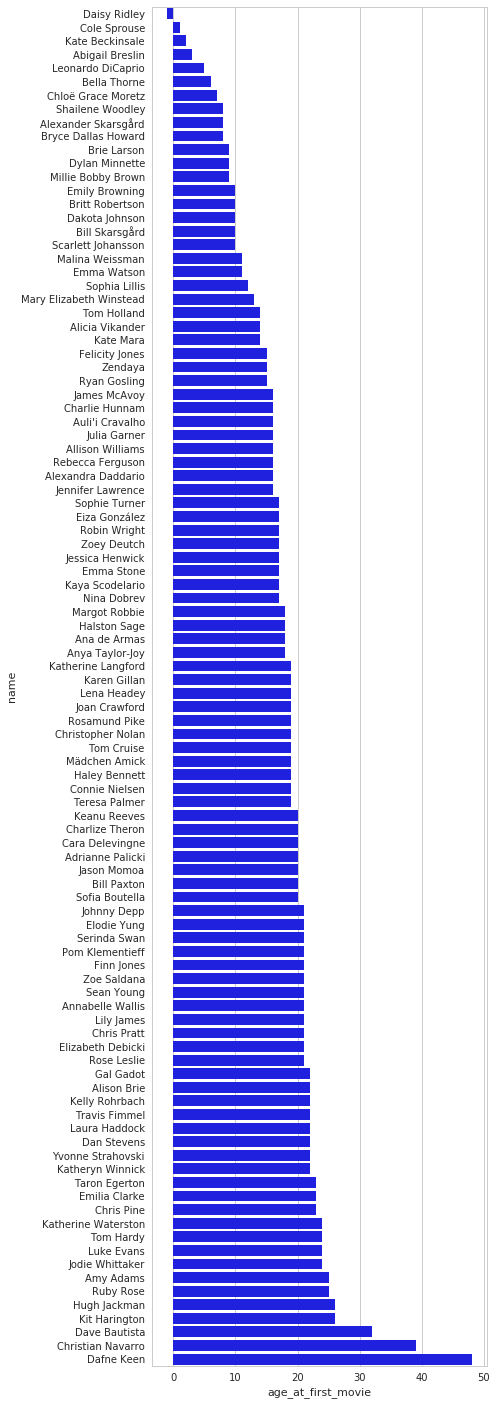

In [81]:
sns.set(style='whitegrid')

# initialize the figure
f, ax = plt.subplots(figsize=(6, 25))

# prepare the dataframe
frame_to_plot = frame.sort_values(by=['age_at_first_movie'], ascending=True)

sns.barplot(x='age_at_first_movie', y='name', data=frame_to_plot, label='Age At First Movie', color='b')

Clearly Daisy Ridley was not of negative age/unborn when she made her first movie as it would seem from looking at the data for our new field.  It turns out that Daisy Ridley voiced the lead female role for the English translation (made in 2015) of the Japanese animated classic Only Yesterday from Studio Ghibli.  Dev Patel from Slumdog Millionaire fame voiced the male lead.  While the translation was released in 2016, the original was released in 1991 resulting in a value of -1 for Daisy Ridley's age_at_first_movie predictor (the actress was born in 1992).  Since her first credit according to IMDB occurred in 2012, she should not show up in our list of performers who made their first movie before 12 in 1.7.1.  It turns out that the birth years for Christian Navarro and Dafne Keen (listed in our staff_starinfo json file don't match those on their IMDB pages leading to questionable values for age at first movie for those two actors as well.  While you we don't expect you to find or handle these issues in your homework, these are the sorts of problems that you'll run into as a data scientist and you should always do some EDA/Data Cleansing whenever you receive new data.

#### 1.7.1

In [52]:
# your code here


In [53]:
df17 = frame.groupby('age_at_first_movie')
print ("{} performers made their first movie at 17".format(len(df17.get_group(17))))

8 performers made their first movie at 17


Your output should look like this:<BR>
8 performers made their first movie at 17

#### 1.7.2

In [54]:
# your code here


We use a compound pandas mask (frame.age_at_first_movie<=12) & (frame.age_at_first_movie>=0) to both find child performers who had their first credits at 12 and younger but also to weed out any entries below 0.

In [91]:
fields2 = ['name', 'year_born', 'first_movie', 'year_first_movie', 'age_at_first_movie']
childdf = frame[(frame.age_at_first_movie<=12) & (frame.age_at_first_movie>=0)][fields2]
childdf
print ("{} performers made their first movie before age 12".format(len(childdf.name)))

20 performers made their first movie before age 12


#### 1.7.3

In [96]:
highest_performer_name = frame.name[frame.credits.idxmax]
highest_performer_credits = frame.credits[frame.credits.idxmax]
print ("{} had the most credits with {}".format(highest_performer,highest_performer_credits))

Sean Young had the most credits with 122


#### 1.8

In [56]:
# your code here


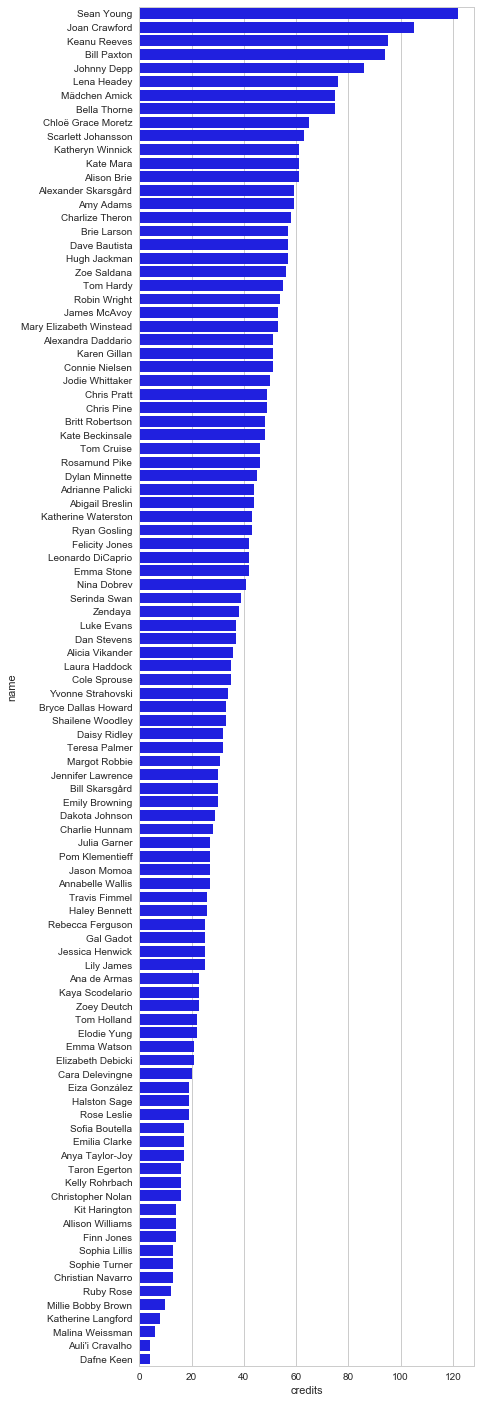

In [57]:
sns.set(style='whitegrid')

# initialize the figure
f, ax = plt.subplots(figsize=(6, 25))

# prepare the dataframe
frame_to_plot = frame.sort_values(by=['credits'], ascending=False)

sns.barplot(x='credits', y='name', data=frame_to_plot, label='Credits', color='b')